<a href="https://colab.research.google.com/github/gabrielurbanin/analise-crimes-rj/blob/master/Analisando_crimes_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do histórico de crimes contra a propriedade no Rio de Janeiro

<img alt="Colaboratory logo" width="200%" src="https://raw.githack.com/gabrielurbanin/analise-crimes-rj/master/fundo_crimes_rj.png">

  

O Rio de Janeiro é, sem dúvidas, um dos estados brasileiros mais conhecidos pelo mundo, e também por todo território nacional. Afinal, o estado abriga pontos turísticos reconhecidos mundialmente - como o Cristo Redentor, o pão de açucar e a praia de copacabana - além de ser lar dos principais desfiles de carnaval do país.

Entretanto, o Rio de Janeiro também é famoso por seus índices de criminalidade. De acordo com dados do 11º Anuário de Segurança Pública, publicado pelo Fórum Brasileiro de Segurança Pública em 2017, o Rio de Janeiro foi considerado o décimo estado mais violento do Brasil.

Trazendo para o cenário atual, conforme levantamento do Grupo Tracker - empresa de rastreamento e localização de veículos - realizado no mês de Abril de 2020, mesmo durante a pandemia de Covid-19, o índice de roubos e furtos de motocicletas aumentou 200% no estado carioca.

Devido a esses fatores, neste notebook analisarei o histórico de crimes contra a propriedade, tendo foco em veículos, no estado do Rio de Janeiro entre os anos de 1991 e 2019.



## Obtenção dos Dados


Os dados para essa análise foram obtidos diretamente do site do Instituto de Segurança Pública para o estado do Rio de Janeiro, que você pode acessar [clicando neste link](http://www.ispdados.rj.gov.br/estatistica.html)



### Importando os dados

O arquivo csv que será importado é o "Estatísticas de segurança: série histórica mensal no estado desde 01/1991".

Antes de qualquer coisa, será necessário importar a biblioteca `pandas` que facilita o tratamento e a análise dos dados com python, para então adicionar o csv a um _DataFrame_.

In [52]:
# Importando pandas

import pandas as pd

In [53]:
# Adicionando o csv a um DataFrame

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Inicialmente, irei tomar noção das dimensões do nosso _DataFrame_ e de como os dados estão organizados nas colunas.



In [54]:
# Verificando tamanho do DataFrame

print('Número de entradas:', df.shape[0],
      '\nNúmero de variáveis:', df.shape[1])

Número de entradas: 344 
Número de variáveis: 56


Como o foco da minha análise serão os dados sobre crimes contra a propriedade (veículos), nem todas as variáveis precisam ser utilizadas.


In [55]:
# Listando todas as variáveis do DataFrame

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Dessa forma, aqui estão as variáveis que serão úteis para a minha análise:
- `ano`: ano de coleta daquele dado.
- `mes`: mês de coleta daquele dado.
- `roubo_veiculos`: quantidade de veículos roubados naquele mês.
- `furto_veiculos`: quantidade de veículos furtados naquele mês.
- `recuperacao_veiculos`: quantidade de veículos recuperados pela polícia naquele mês.

Nesse caso, é importante ressaltar a diferença entre furto e roubo: no furto, não há episódio de violência ou ameaça contra a vítima. Já o roubo consiste na ocorrência de ameaça ou violência contra quem está sendo roubado (sinônimo de assalto).

Aqui estão as 5 primeiras entradas do _DataFrame_:

In [56]:
# Renomeando variáveis

df = df.rename(columns= {'vano':'ano', 'roubo_veiculo':'roubo_veiculos'})

# 5 primeiras entradas do DataFrame

df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculos,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É fácil ver que há algumas variáveis que apresentam dados ausentes (NaN). Talvez esses dados ainda não haviam sido coletados nos primeiros anos e passaram a ser coletados posteriormente. 

Para verificar essa hipótese, irei mostrar as 5 últimas entradas do DataFrame:

In [93]:
# 5 últimas entradas do DataFrame

df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculos,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Agora todas as variáveis apresentam valores, o que mostra que certos tipos de crimes só começaram a ter seus dados coletados a partir de certa data.

Como só preciso das variáveis relacionadas a veículos, irei criar um novo _DataFrame_ `df_veiculos` que contém somente essas variáveis. Para isso, basta criar uma cópia de `df` selecionando as colunas necessárias.

In [94]:
# Cópia do DataFrame original com as variáveis necessárias

df_veiculos = df[['ano','roubo_veiculos', 'furto_veiculos', 'recuperacao_veiculos']].copy()

# 5 primeiras entradas do novo DataFrame

df_veiculos.head()

,ano,roubo_veiculos,furto_veiculos,recuperacao_veiculos
0,1991,1174,2009,872
1,1991,1097,1850,751
2,1991,1265,2084,789
3,1991,1415,2085,787
4,1991,1449,2185,845


In [95]:
# Tipos dos dados de cada variável

df_veiculos.dtypes

ano                     int64
roubo_veiculos          int64
furto_veiculos          int64
recuperacao_veiculos    int64
dtype: object

Além disso, também é necessário verificar se o _dataset_ não está comprometido pela ausência de valores:


In [96]:
# Valores ausentes no DataFrame

df_veiculos.isnull().sum() / df_veiculos.shape[0] 

ano                     0.0
roubo_veiculos          0.0
furto_veiculos          0.0
recuperacao_veiculos    0.0
dtype: float64

O código a cima verificou que não há nenhum valor NaN para as variáveis selecionadas. Portanto, os dados para essas variáveis foram coletados durante todo o intervalo (todos os meses entre 1991 a 2019), o que significa que já posso partir para a análise estatística dos dados.

## Informações Estatísticas 

Inicialmente, irei usar o método `describe()` para retirar dados estatísticos sobre cada variável.

In [97]:
# Dados estatísticos sobre cada variável

df_veiculos.describe()

,ano,roubo_veiculos,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000,344.000000
mean,2004.837209,2448.697674,1674.671512,1772.238372
std,8.289036,789.689559,294.852020,656.761843
min,1991.000000,1097.000000,1159.000000,729.000000
25%,1998.000000,1889.750000,1430.500000,1276.750000
50%,2005.000000,2322.000000,1637.500000,1755.000000
75%,2012.000000,2778.000000,1833.250000,2202.000000
max,2019.000000,5358.000000,2630.000000,3695.000000


Como são dados quantitativos coletados pelo governo em uma localização específica, não há necessidade de procurar por outliers na quantidade de crimes, pois encontrá-los e tratá-los poderá prejudicar a acuracidade da análise. Portanto, é possível encontrar a média de veículos roubados, furtados e recuperados por mês sem preocupações à respeito da confiabilidade dessa estimativa.

In [98]:
# Média da variável roubo_veiculos

print("Média de veículos roubados: {:.0f}".format(df_veiculos.roubo_veiculos.mean()))

Média de veículos roubados: 2449


In [99]:
# Média da variável furto_veiculos

print("Média de veículos furtados: {:.0f}".format(df_veiculos.furto_veiculos.mean()))

Média de veículos furtados: 1675


In [100]:
# Média da variável recuperacao_veiculos

print("Média de veículos recuperados: {:.0f}".format(df_veiculos.recuperacao_veiculos.mean()))

Média de veículos recuperados: 1772


Além disso, é possível calcular a taxa (%) média mensal de recuperação desses veículos:

In [101]:
# Média da taxa de recuperação de veículos por mês

taxa_recuperacao_mensal = df_veiculos.recuperacao_veiculos.mean() / (df_veiculos.roubo_veiculos.mean() + df_veiculos.furto_veiculos.mean()) * 100
print("Taxa média mensal de veículos recuperados pela polícia: {:.1f}%".format(taxa_recuperacao_mensal))

Taxa média mensal de veículos recuperados pela polícia: 43.0%


Para uma análise mais completa, os dados correspondentes a cada ano serão verificados. Para isso, irei criar um novo _DataFrame_ de nome `df_anual` com os dados em perspectiva anual.

Nesse _DataFrame_, duas novas variáveis serão adicionadas:
- `total_crimes`: soma da quantidade de furtos e roubos no ano de referência.
- `taxa_recuperacao`: taxa de recuperação de veículos pela polícia no ano de referência.

In [102]:
# Novo DataFrame com os dados em perspectiva anual

ano = [i for i in range(1991,2020)]
ro_ve = list(df_veiculos.groupby('ano').roubo_veiculos.sum())
fu_ve = list(df_veiculos.groupby('ano').furto_veiculos.sum())
re_ve = list(df_veiculos.groupby('ano').recuperacao_veiculos.sum())

dic_df = {'ano': ano,
          'roubo_veiculos': ro_ve,
          'furto_veiculos': fu_ve,
          'recuperacao_veiculos' : re_ve}

df_anual = pd.DataFrame(data=dic_df)

df_anual.set_index(['ano'], inplace=True)

# Adição das novas variáveis

df_anual['total_crimes'] = df_anual.roubo_veiculos + df_anual.furto_veiculos
df_anual['taxa_recuperacao'] = df_anual.recuperacao_veiculos/df_anual.total_crimes

# 5 primeiras entradas do DataFrame

df_anual.head()

,roubo_veiculos,furto_veiculos,recuperacao_veiculos,total_crimes,taxa_recuperacao
ano,,,,,
1991,16452,23979,9890,40431,0.244614
1992,24502,27619,11246,52121,0.215767
1993,24790,26897,11619,51687,0.224795
1994,27470,26231,16030,53701,0.298505
1995,23676,21928,17622,45604,0.386413


Assim, posso verificar em quais anos as taxas de recuperação de veículos foram mais altas e mais baixas:

In [103]:
# Valores máximo e mínimo para a taxa de recuperação de veículos anual

recuperacao_max = df_anual.taxa_recuperacao.max()
recuperacao_min = df_anual.taxa_recuperacao.min()

print("Maior taxa de recuperação: {:.1f}% no ano de 2017".format(recuperacao_max*100),
      "\nMenor taxa de recuperação: {:.1f}% no ano de 1992".format(recuperacao_min*100))

Maior taxa de recuperação: 56.1% no ano de 2017 
Menor taxa de recuperação: 21.6% no ano de 1992


Somente com esse valores é possível formular a hipótese de que a eficiência da polícia na recuperação de veículos aumentou ao longo dos anos. No entanto, a confirmação dessa hipótese requer uma análise mais detalhada.


## Visualização de Dados

Para facilitar a elaboração de conclusões a respeito dos valores obtidos na análise a cima, é importante plotar gráficos que facilitem a visualização desses dados:


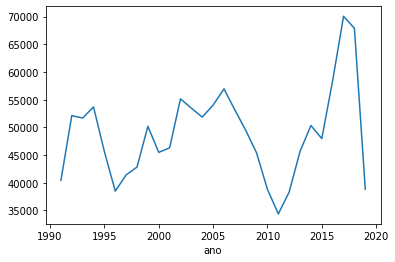

In [83]:
# Gráfico de barras para a quantidade de crimes contra propriedade em cada ano

df_anual.total_crimes.plot.line();

O gráfico a cima mostra que o total de crimes oscilou bastante ao longo do período analisado. No entanto, é possível perceber intervalos de tempo com altas e quedas bem definidas. Esses intervalos serão mostrados abaixo.

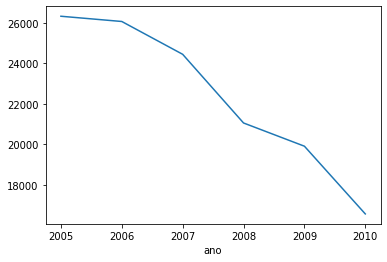

In [92]:
# Período de baixa no total de crimes por ano

df_anual.loc[2005:2010].recuperacao_veiculos.plot.line();

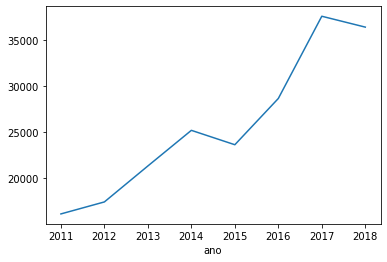

In [90]:
# Período de alta no total de crimes por ano

df_anual.loc[2011:2018].recuperacao_veiculos.plot.line();

Vários fatores podem ter estimulado o período de queda entre 2005 e 2010 e o período de alta entre 2011 e 2018. Cabe à polícia militar o estudo desses gráficos para rever quais práticas e realidades estimularam essas tendências, de modo a tentar replicá-las ou eliminá-las do planejamento futuro.

Já quanto a recuperação de veículos, é possível ver no gráfico abaixo que, apesar das oscilações, a curva total apresentou uma tendência de alta no intervalo de 1991 a 2019. Seria essa mais uma evidência de que a eficiência da polícia militar aumentou na recuperação de veículos?

Não é possível dizer, pois somente com esses dados não há como elaborar nenhuma previsão para o futuro. Não há nada que garanta que na próxima década os numeros não irão cair novamente.

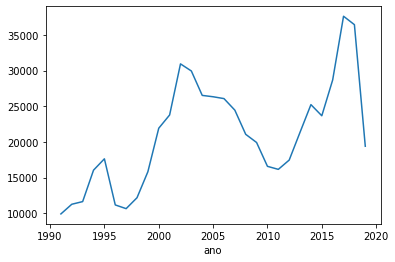

In [84]:
# Gráfico de barras para a taxa de recuperação de veículos pela polícia em cada ano

df_anual.recuperacao_veiculos.plot.line();

## Conclusão


Essa foi apenas uma análise superficial sobre os números referentes ao crime contra a propriedade no Rio de Janeiro entre os anos de 1991 e 2019.

Como previsto inicialmente, os números realmente confirmam que o estado carioca sempre possuiu um índice de criminalidade alto que oscila, mas não apresenta uma queda definitiva.

Entretanto, a forma como as autoridades têm lidado com esse fato se apresentou promissora, tendo uma alta na recuperação dos veículos no período analisado.